In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, kde
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [10]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [12]:
data = sns.load_dataset('titanic')
print(data)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [17]:
data['age'].nunique()

88

In [24]:
missing_values = data['age'].isnull().sum()
print(f"Missing values in age is : {missing_values}")

Missing values in age is : 177


In [27]:
data['age'] = data['age'].fillna(data['age'].median())
missing_values = data['age'].isnull().sum()
print(f"Missing values after imputation in age col is : {missing_values}")

Missing values after imputation in age col is : 0


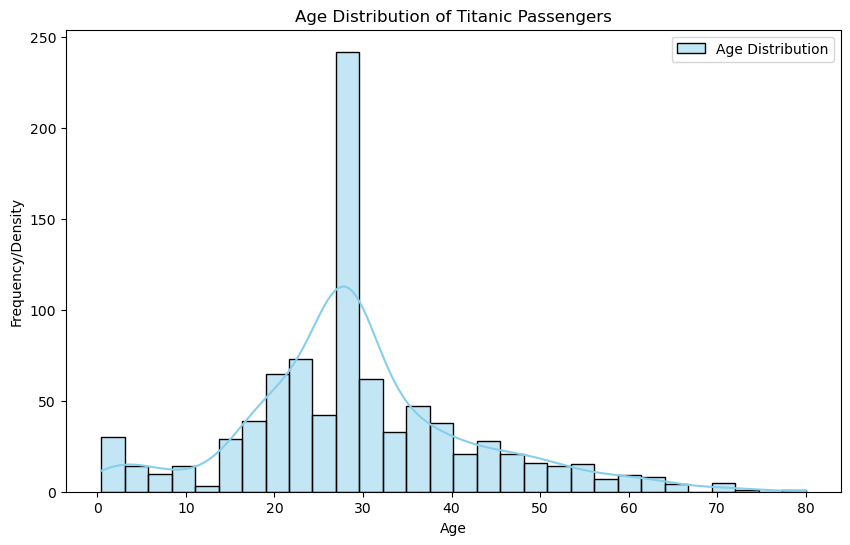

In [33]:
# Plot Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue', label='Age Distribution')
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency/Density")
plt.legend()
plt.show()

In [34]:
# Summary Statistics
age_mean = data['age'].mean()
age_median = data['age'].median()
age_std = data['age'].std()

print(f"Mean Age: {age_mean:.2f}")
print(f"Median Age: {age_median:.2f}")
print(f"Standard Deviation: {age_std:.2f}")

Mean Age: 29.36
Median Age: 28.00
Standard Deviation: 13.02


In [37]:
mu, sigma = norm.fit(data['age'])
print(mu)
print(sigma)

29.36158249158249
13.012388272793666


In [43]:
x = np.linspace(data['age'].min(), data['age'].max(), 1000)
pdf = norm.pdf(x,mu, sigma)

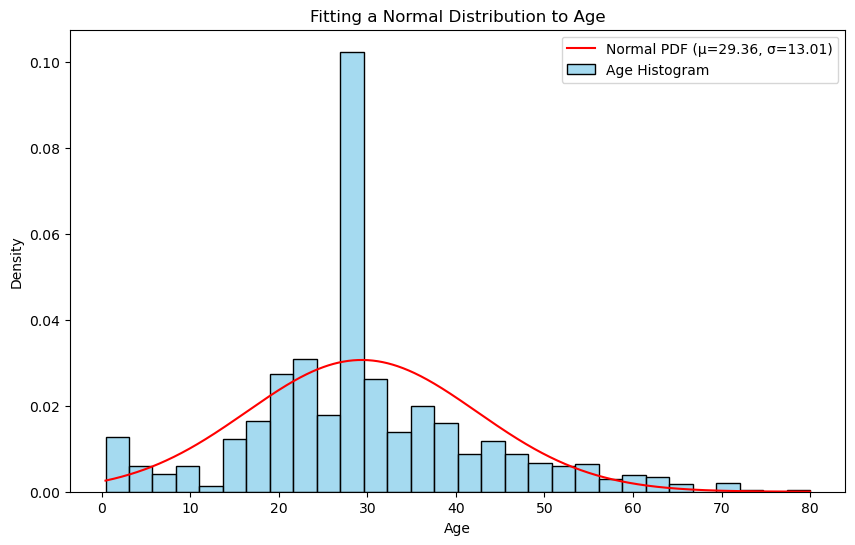

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=False, color='skyblue', label='Age Histogram', stat='density')
plt.plot(x, pdf, 'r-', label=f'Normal PDF (μ={mu:.2f}, σ={sigma:.2f})')
plt.title("Fitting a Normal Distribution to Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

In [47]:
np.linspace(0,10,100)

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96